# Lojistik Regresyon

Diabets veri seti incelemesi:

- Amacımız: Veri setinin içerdiği bilgiler ile, bir hasta geldiğinde onun şeker hastası olup olmadığını tahmin edebilecek bir makine öğrenmesi modeli geliştirmek

Pregnancies: Daha önce geçirilen hamilelik sayısı

Glucose : kandaki glikoz seviyesi

BloodPressure: kan basıncı

SkinThickness: cilt kalınlığı

Insulin : İnüsilin değeri

BMI: Vücut kitle endeksi

DiabetesPedigreeFunction : Diyabetin Pedigri İşlevi

Age: yaş

Outcome: 1 → diabet, 0→ sağlıklı

Outcome : çıktı/hedef/bağımlı/y değişkeni

In [2]:
import pandas as pd

In [3]:
diabets = pd.read_csv("diabetes.csv")
df = diabets.copy()
df = df.dropna() 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


768 gözlemimiz bulunmakta.

BMI ve DiabetesPedigreeFunction sürekli değişkenler, diğer 7 değişken ise kesikli değişken olarak görülüyor.

Burada dikkat edilmesi gereken nokta Outcome değişkeninin aslında kategorik bir değişken olduğudur. Değişken dönüştürme işlemi ile Outcome un veri tipini düzenleyebiliriz.

Bağımlı değişkenimizi inceleyelim:

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

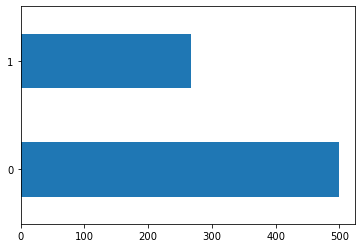

In [6]:
df["Outcome"].value_counts().plot.barh();

diyabet olan kişi sayısı 268, geri kalan 500 kişi diyabet değil.

betimsel istatistiklere bakalım:

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pregnancies ortalaması yaklaşık 4, standart sapması yaklaşık 3 olan bir dağılım. Max değeri olan 17 bir uç değerdir.
şeklinde yorumlamalar yapılır.

Outcome değişkenini 1 yapan ayırt edici değişkenler hangileri olabilir? Bu sorunun cevabını lojistik regresyon modeli kurarak arayalım:

## Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [11]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1) # Bağımsız değişkenimiz X' in, y' yi etkileyebilecek değişkenlerden oluşması gerekir. Bunun için y değerleri olan Outcome sütununu X değişkenimizden çıkartalım.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [17]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

## Tahmin & Tuning

not: Lojistik regresyonun hiperparametresi (dışsal parametre) yoktur. Lojistik regresyon modelinin optimize edilebilecek nitelikte olan tek parametresi sabit(intercept point) olarak adlandırılan B0 parametresidir. Bu nedenle model tuning işleminden ziyade model doğrulama işlemi gerçekleştireceğiz.

not: Sınıflandırma problemlerinde ele aldığımız bağımlı değişkenin ilgilendiğimiz sınıfın doğru sınıf olup olmadığını kontrol etmemiz iyi olur.

In [18]:
y_pred = loj_model.predict(X_test)

In [19]:
y_pred_prob = loj_model.predict_proba(X_test)[:,1]
y_pred_prob[:10]

array([0.33681746, 0.22401534, 0.17647903, 0.21354301, 0.43393777,
       0.42103453, 0.05413711, 0.66248177, 0.53523676, 0.66828606])

.predict_proba() fonksiyonu

olasılık üreten fonskiyonun olasıklarının çıktılarını gösterir.
çıktının lojistik regresyon için fonksiyonun ilk sütunu 0. sınıfa ait olma olasılıklarını, ikinci sütunu ise 1. sınıfa ait olma olasıklarını gösterir.

In [20]:
logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

ROC Eğrisi

Bir veya birden fazla sınıflandırıcının başarısının değerlnedirilmesi için kullanılan bir tekniktir. Gerçek pozitif ve yanlış pozitif oranlarının üzerine kurularak oluşturulan istatistiksel bir karşılaştırma tekniğidir. Modelin başarısı ROC eğrsinin altından referans çizgisine kadar olan EUC alanının büyüklüğü ile ölçülür. Ne kadar büyük bir alansa o kadar başarılı bir modeldir.

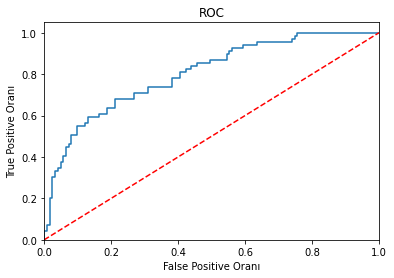

In [23]:
plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

eğer hiçbir modelleme çalışması yapmasaydım kırmızı kesikli çizgi benim zaten elde edecek olduğum başarıyı gösterir. (Tahmin değerlerini rastgele bir şekilde 1 ve 0 olarak atasam ortaya çıkacak başarı durumu).

Amacımız model kurarak bu kırmızı çizgiden olabildiğince uzaklaşmak

mavi eğri benim lojistik regresyon ile model kurduğum zaman oluşan ROC eğrim.

EUC değeri mavi eğri ile kırmızı doğru arasında kalan alandır ve 0 ile 1 arasındadır. ---> bu alan modelimizin başarısını gösteren bir değerdir.

In [24]:
confusion_matrix(y_test, y_pred)

array([[100,  23],
       [ 26,  43]], dtype=int64)

In [25]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7447916666666666

modelimizi cross validation yöntemi ile doğrulayalım:

In [26]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7397368421052632

cross_val_score fonksiyonunun

1. argümanı : modelimizi yazmamız lazım

2. argümanı : Bu model içine yerleştirilmek istenen bağımsız değişken seti

3. argümanı : Bu model sonucunda ortaya çıkacak olan tahmini bağımlı değişkenleri karşılaştrımak istediğimiz y değerleri

4. argüman : cross validation ı kaç katlı yapacağımız 

* hesapladığımız çapraz doğrulama değerlerinin ortalaması, kurduğumuz modelin doğruluğunu gösteren değerdir.